In [1]:
# Import all necessary libs 
import numpy as np
import sys
from diaglib.data.diagset.containers import Scan
from diaglib import config
from tqdm import tqdm
from itertools import product
import  timm
import torch
from torch import nn 
import numpy as np
from PIL import Image
import torch
from torchvision import transforms
from vit_extractor import Extractor 
import os
import torch
import torch.nn as nn
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt
from math import gcd

In [2]:
import openslide

In [3]:
# some base settings 
c_dir = 'patches'  # put your wsi patches there  + annotations too (that's not perfect deasign, I know)
scan_id = '67E0941C-1D06-40A1-9605-4FE0E1247C4C' # your example patch id 
image_size=(256, 256) # size of pachtes 
minimum_overlap=0.75 # minimum class overlap to assign the class 
blob_size=128 # blob size for patches 

In [4]:
scan = Scan('S', 3, c_dir + '/' + scan_id, scan_id, 'local') # create scan object for given wsi 
scan.polygons # create polygons
scan.load_annotation_polygons() # load polygon annotations 

Unrecognized label "P" in the annotation file. Ignoring.
Unrecognized label "P" in the annotation file. Ignoring.


In [5]:
# Lets explain what is what here: 
# We load our scan in this case for 'S' type which stands for Prostate cancer (default one for Diagset), at 3 mag level (used to calculate downsample) and with (c_dir + '/' + scan_id) path, scan id and loading type  (local)
print(f"We can select multiple parameters of our loaded slide, such as: \nwidth:{scan.width}\nheight:{scan.height}\noffset:{scan.offset}\nmpp:{scan.mpp}\nlens:{scan.lens}\nmagnification:{scan.magnification}")

We can select multiple parameters of our loaded slide, such as: 
width:217088
height:60928
offset:[10397400, -1517766]
mpp:[0.2266648533478399, 0.2266648533478399]
lens:40
magnification:5.0


In [6]:
# now important point - we have selcted level 3 which stands for fourth piramidal level in openslide (effectively 5x mag in our case) but microns per pixel (mpp) are still holding original values (for 40x mag)

In [7]:
scan.polygons # that way you can check what kind of polygons are there 

{'BG': <MULTIPOLYGON EMPTY>,
 'T': <MULTIPOLYGON (((122192.45 17405.326, 122182.448 17410.329, 122167.448 17421...>,
 'N': <MULTIPOLYGON (((25906.526 19729.814, 25896.525 19721.482, 25886.528 19715.4...>,
 'A': <MULTIPOLYGON EMPTY>,
 'R1': <MULTIPOLYGON (((28214.564 19000.14, 28206.565 18980.141, 28198.567 18970.13...>,
 'R2': <MULTIPOLYGON (((27881.567 18560.142, 27874.564 18550.141, 27860.566 18548.1...>,
 'R3': <MULTIPOLYGON (((121955.454 16348.604, 121954.446 16348.316, 121938.449 1634...>,
 'R4': <MULTIPOLYGON (((27641.889 20278.645, 27642.137 20279.76, 27642.137 20278.06...>,
 'R5': <MULTIPOLYGON (((26627.185 19613.066, 26622.517 19609.436, 26616.169 19604.3...>}

In [8]:
# we have multiple classes existing within our slide boundaries with BG and A missing 

In [9]:
image_size=(256, 256)
minimum_overlap=0.75
blob_size=128
stride = (128,128) # 128,128 basically means that our windows goes this many pxls for each move 
tissue_tag= 'S' # prostate 

In [10]:
images, positions, img_pos = scan.get_image_position_and_label(scan, image_size, stride, minimum_overlap, tissue_tag, config)


  0%|          | 0/1152 [00:00<?, ?it/s]Unrecognized label "P" in the annotation file. Ignoring.
Unrecognized label "P" in the annotation file. Ignoring.
100%|██████████| 1152/1152 [00:22<00:00, 50.92it/s]


In [11]:
print(f"What matters to you the most is img_pos, there you can find image - coordinates pairs like this: {img_pos['T'][0][1]}, I skipped image (which is on index 0) since it's just not handy to show it")

What matters to you the most is img_pos, there you can find image - coordinates pairs like this: [27648, 21504], I skipped image (which is on index 0) since it's just not handy to show it


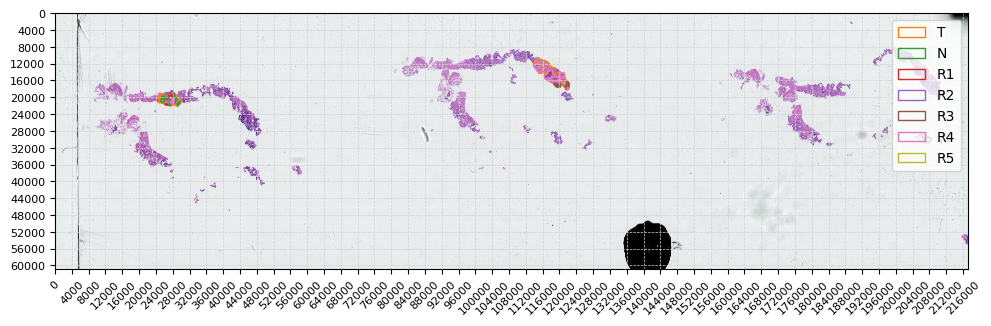

In [12]:
scan.plot_full_slide()

In [15]:
# now you can see an interesting are for which 0,0 px will be 2000,16000 (x,y) coordinates. Lets make your window to be 10k px each side

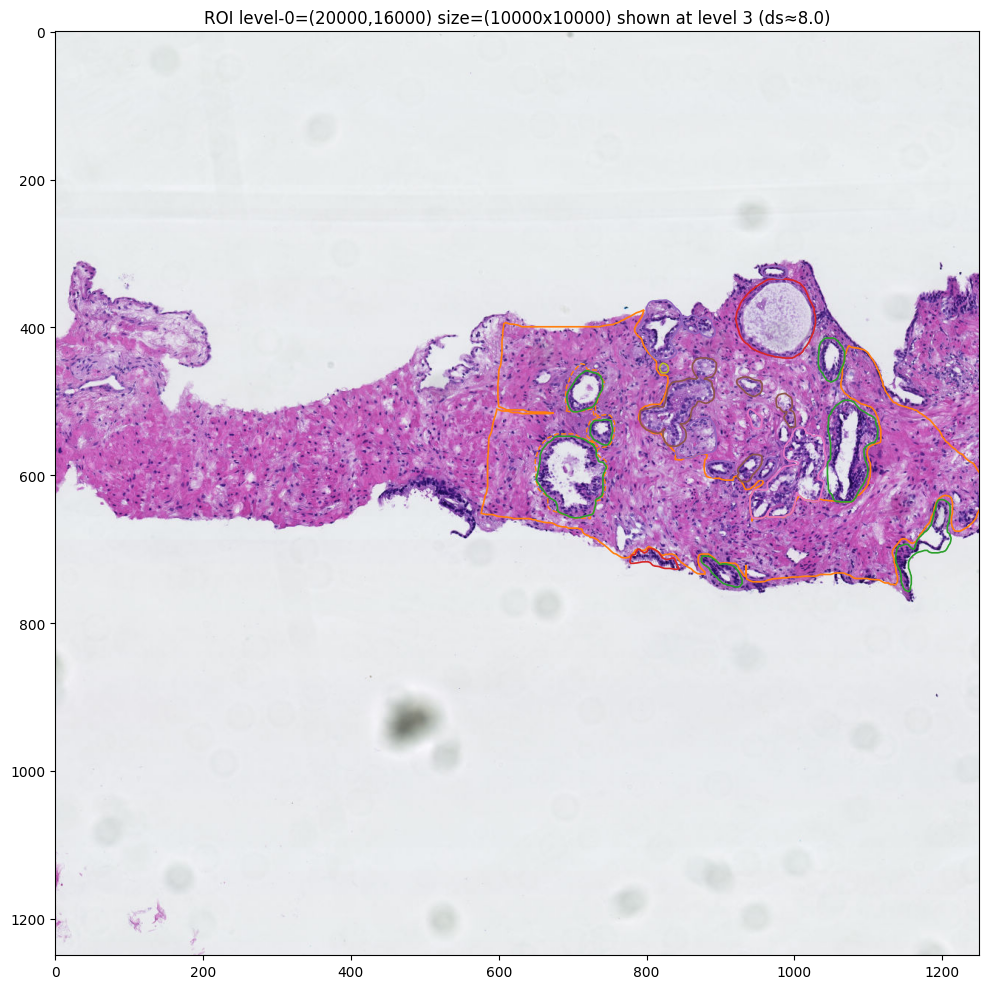

(3, (8.0, 8.0))

In [14]:
scan.show_roi_level0(
    x0_0=20000, y0_0=16000,
    w0=10000, h0=10000,
    downsample=8,   
)

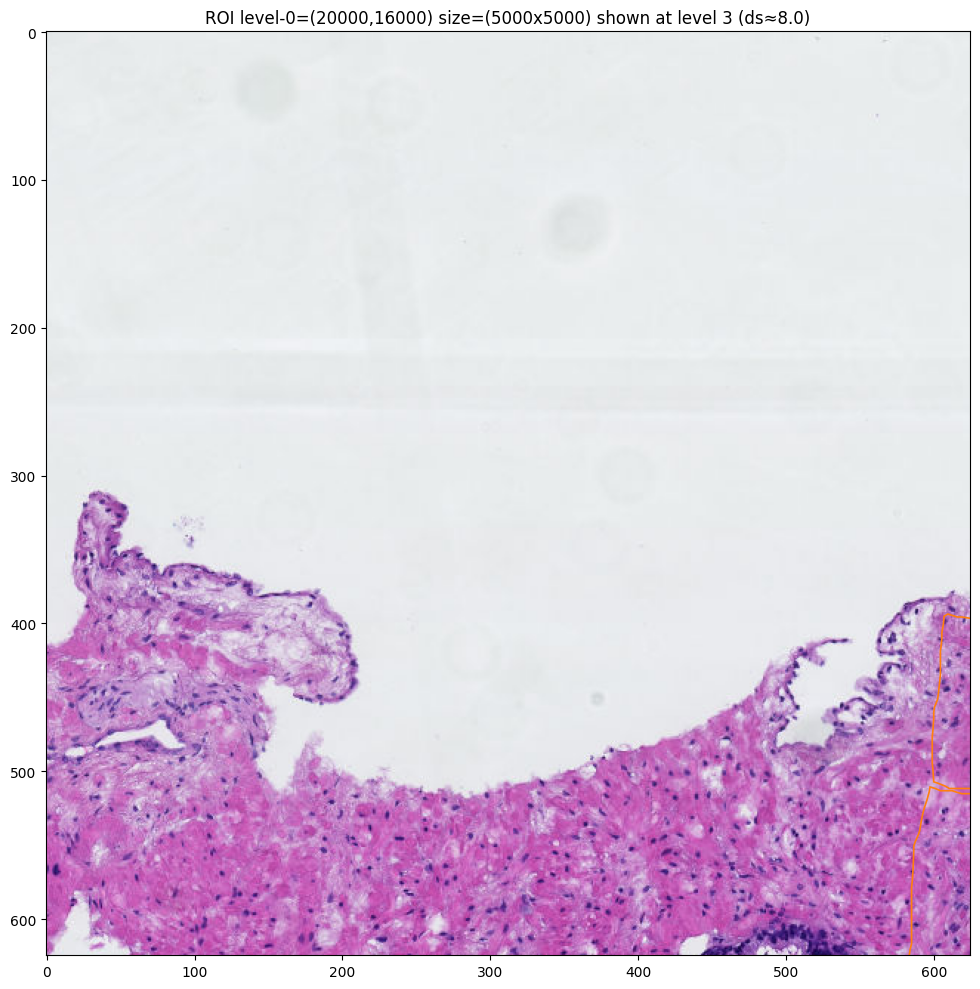

(3, (8.0, 8.0))

In [16]:
# let's say you ain't happy with this mag and want to see it closer -> then just make your window smaller 
scan.show_roi_level0(
    x0_0=20000, y0_0=16000,
    w0=5000, h0=5000,
    downsample=8,   
)

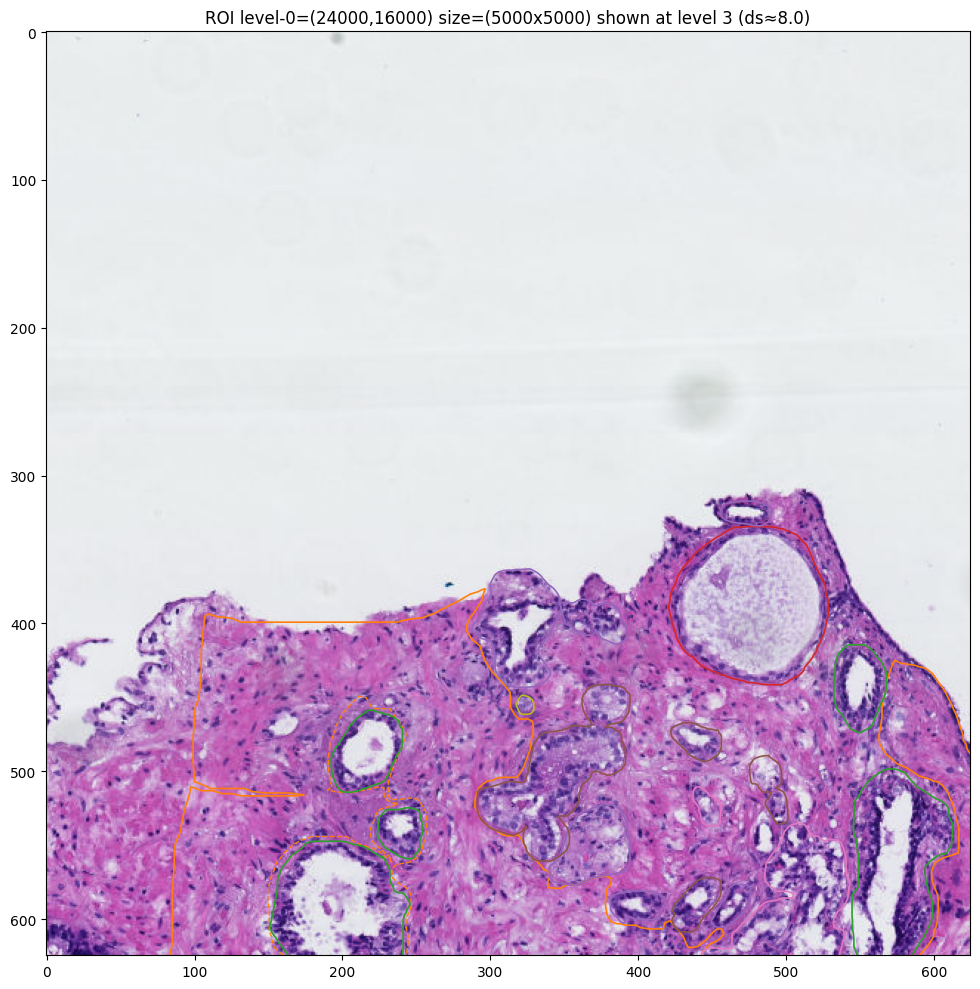

(3, (8.0, 8.0))

In [18]:
# Bit too left to see ROI right? lets correct it bu setting x axus more on the right 
scan.show_roi_level0(
    x0_0=24000, y0_0=16000,
    w0=5000, h0=5000,
    downsample=8,   
)

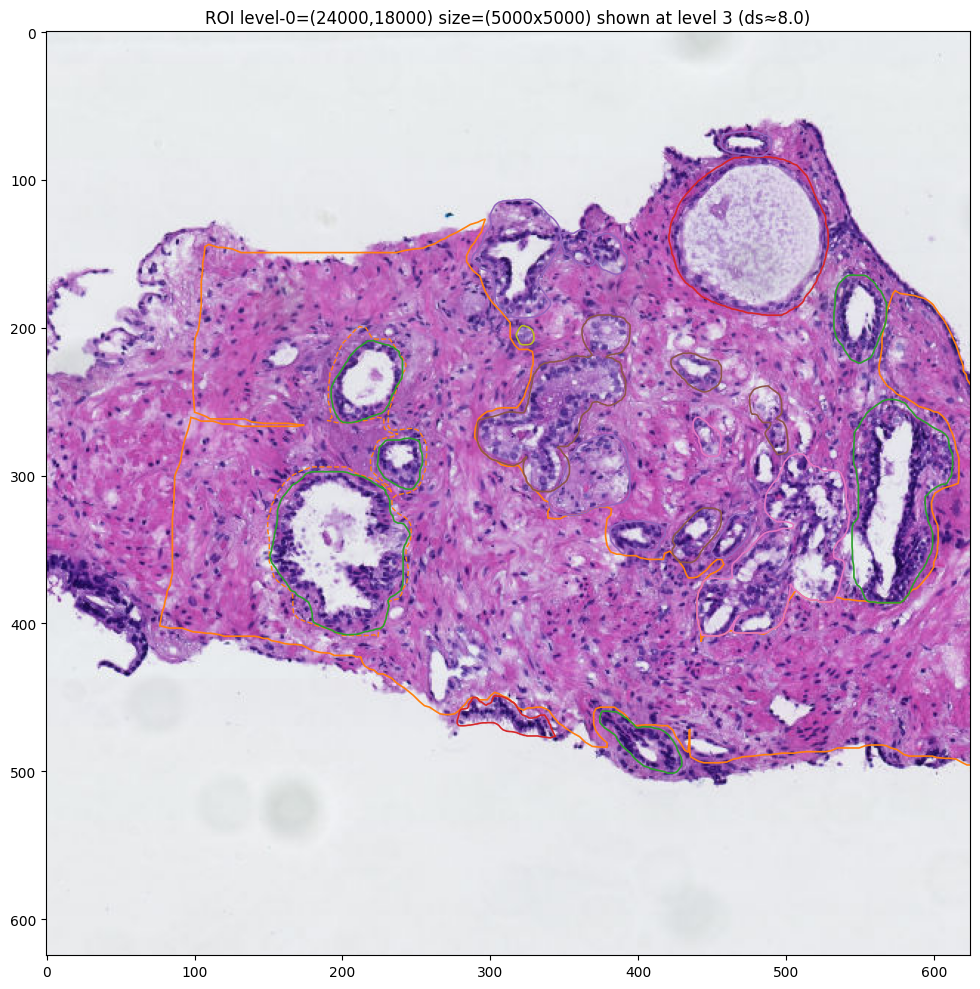

(3, (8.0, 8.0))

In [19]:
# Now a bit down

scan.show_roi_level0(
    x0_0=24000, y0_0=18000,
    w0=5000, h0=5000,
    downsample=8,   
)

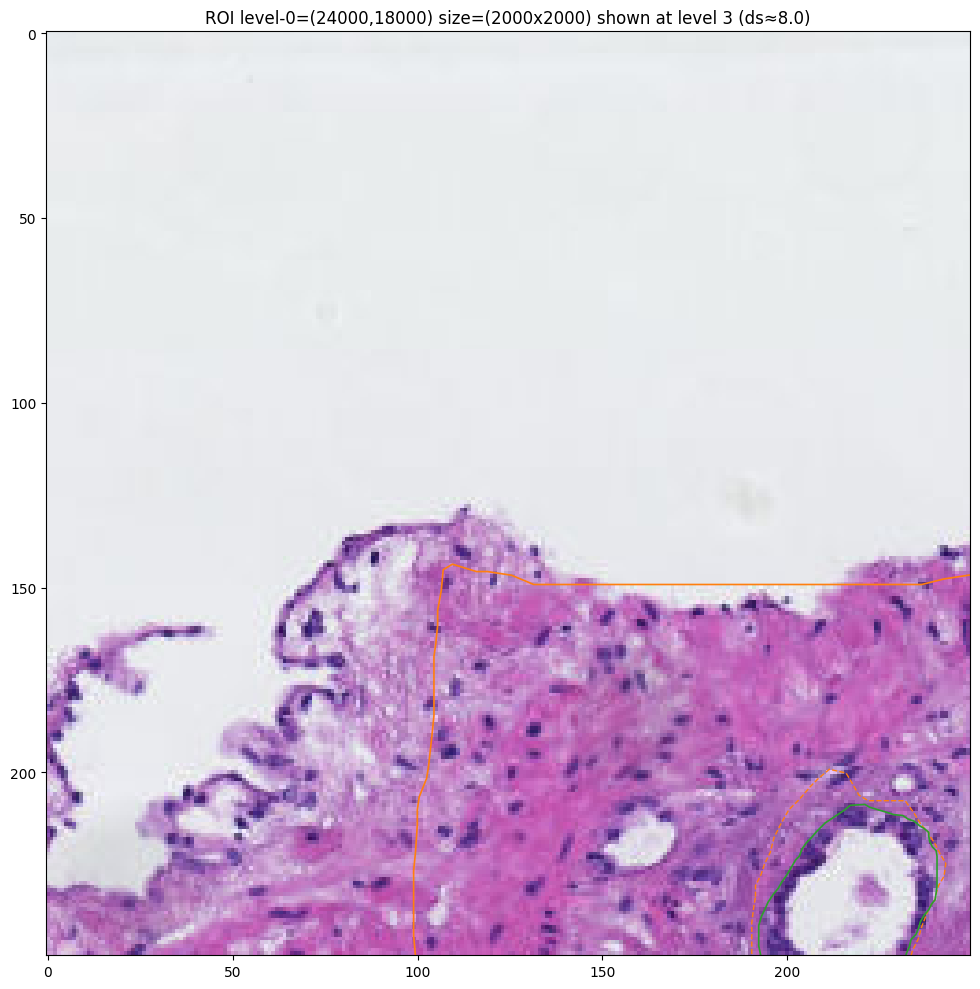

(3, (8.0, 8.0))

In [20]:
# And zoom
scan.show_roi_level0(
    x0_0=24000, y0_0=18000,
    w0=2000, h0=2000,
    downsample=8,   
)